决策树
======
决策树(Decision Tree)算法是一种基本的分类与回归算法。一般的，一棵决策树包含一个根结点、若干个内部结点和若干个叶节点。叶节点对应于决策结果，其他每个结点则对应于一个属性测试，每个结点包含的样本集合根据属性测试的结果被划分到子结点中。根节点包含样本全集，从根节点到每个叶节点的路径对应了一个判定测试序列。决策树学习的目的是为了产生一棵泛化能力强，即能处理未见事例强的决策树。

![](dtalgothm.png)

决策树的生成是一个递归过程，在决策树基本算法流程中，有三种情形会导致递归返回：
1. 当前结点包含的样本全属于同一个类别，无需划分。
2. 当前属性集为空，或是所有样本在所有属性上取值相同，无法划分。
3. 当前结点包含的样本集合为空，不能划分。

在第2种情形下，将当前结点标记为叶节点，并将其类别设定为该节点所含样本最多的类别(当前结点的后验分布)；在第3种情形下，同样把当前结点标记为叶节点，但将其类别设定为其父结点所含样本最多的类别(父节点的样本分布作为当前结点的先验分布)。

决策树学习的关键是如何选择最优划分属性，一般而言，随着划分过程不断进行，期望决策树的分支结点所包含的样本尽可能属于同一类别，即结点的纯度(purity)越来越高。

![](dtsimilar.png)

信息增益
-------------
**信息熵**(information entropy)是度量样本集合纯度最常用的一个指标。假定当前样本集合D中第k类样本所占的比例为$p_k, k = 1,2,\ldots,m$，则D的信息熵定义为：
$$
Ent(D) = -\sum\limits_{k=1}^m p_k log_2 p_k
$$
$Ent(D)$的值越小，则D的纯度越高。

假定离散属性$a$有V个可能的取值$\{a_1,a_2,\ldots,a_v\}$，使用$a$来对样本集D进行划分，则会产生V个分支结点，其中第v个分支结点包含了D中所有在属性$a$上取值为$a_v$的样本，记为$D^v$。于是可计算出用属性$a$对样本集D进行划分所获得的**信息增益**(information gain)：
$$
Gain(D,a) = Ent(D)-\sum\limits_{v=1}^V\frac{|D^v|}{|D|}Ent(D^v)
$$
$\frac{|D^v|}{|D|}$是考虑到不同的分支结点所包含的样本数不同，而给分支结点$v$赋予的权重，即样本数越多的分支结点影响越大。一般而言，信息增益越大，则意味着使用属性$a$来进行划分所获得**纯度提升**越大，因此，可以使用信息增益来进行决策树的划分属性选择。
$$
a_* = \mathop{argmax}\limits_{a \in A} Gain(D,a)
$$
著名的*ID3*决策树学习算法就是以信息增益为准则来选择划分属性。

增益率
----------
实际上，信息增益准则对可取值数目较多的属性有所偏好，为减少这种偏好可能带来的不利影响，著名的*C4.5*决策树算法不直接使用信息增益，而是使用**增益率**来选择最优划分属性，增益率定义为：
$$
IV(a) = -\sum\limits_{v=1}^V \frac{|D^v|}{|D|}log_2\frac{|D^v|}{|D|} \\
Gain\_ratio(D,a) = \frac{Gain(D,a)}{IV(a)}
$$
$IV(a)$称为属性$a$的固有值，属性a的取值数目越多(即V越大)，则$IV(a)$的值通常会越大。

增益率准则对可取值数目较少的属性有所偏好，因此，*C4.5*算法并不是直接选择增益率最大的候选划分属性，而是使用了一个启发式的方法，先从候选划分属性中找出**信息增益**高于平均水平的属性，在从中选择增益率最高的那个属性。

基尼指数
-------------
**CART**决策树使用**基尼指数**来选择划分属性。数据集D的纯度可用基尼值来度量：
$$
Gini(D) = \sum\limits_{k=1}^m \sum\limits_{k^{'} \neq k} p_k \cdot p_{k^{'}} \\
= 1 - \sum\limits_{k=1}^m p_k^2
$$
直观来说，$Gini(D)$反映了从数据集D中随机抽取两个样本，其类别标记不一致的概率。因此，$Gini(D)$越小，则数据集D的纯度越高。属性$a$的基尼指数定义为：
$$
Gini\_index(D,a) = \sum\limits_{v=1}^V \frac{|D^v|}{|D|}Gini(D^v)
$$
然后在候选属性集合A中，选择那个使得划分后基尼指数最小的属性作为最优划分属性，即:
$$
a_* = \mathop{argmin}\limits_{a \in A} Gini\_index(D,a)
$$

In [4]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

clf.predict([[0.568, 1.324]])
clf.predict_proba([[2., 2.]]) #计算属于每个类的概率

array([[0., 1.]])

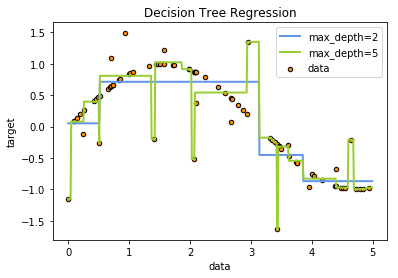

In [18]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel() # 返回一维视图
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()

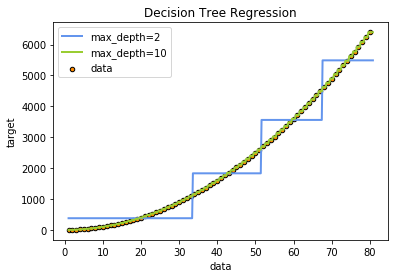

In [9]:
X = []
y = []
for i in range (1,81):
    X.append([i]) 
    y.append(i**2)
X_test = []
for i in np.arange(1.0,81.0,0.2):
    X_test.append([i])
    
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(X, y)
regr_2.fit(X, y)

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=10", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()

sklearn决策树分类器
------------------------------
```python
DecisionTreeClassifier(criterion='gini', # 选择划分属性的标准
                       splitter='best',  # 选择属性结点的原则
                       max_depth=None,  # 决策树最大的深度
                       min_samples_split=2,
                       min_samples_leaf=1,
                       min_weight_fraction_leaf=0.0,
                       max_features=None,
                       random_state=None,
                       max_leaf_nodes=None,
                       min_impurity_split=1e-07, # 树增长停止阀值
                       class_weight=None,
                       presort=False)
```

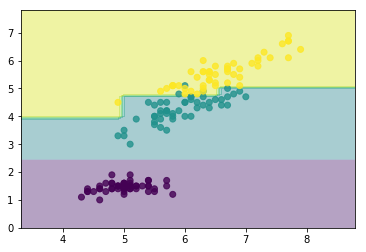

In [16]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier


# 使用自iris数据
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# 训练模型，限制树的最大深度4
clf = DecisionTreeClassifier(max_depth=4)
#拟合模型
clf.fit(X, y)


# 画图
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)